# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
import pandas as pd
!pip install palmerpenguins
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from plotnine import *

penguins = load_penguins()
penguins = penguins.dropna()


y = penguins["bill_depth_mm"]
X = penguins.drop(columns=["bill_depth_mm"])


cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

ct = ColumnTransformer([
    ("scale_num", StandardScaler(), num_features),
    ("encode_cat", OneHotEncoder(drop="first"), cat_features)
])


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [4]:
mlr = Pipeline([
    ("prep", ct),
    ("reg", LinearRegression())
])
mlr.fit(X_train, y_train)

mlr_train = mean_squared_error(y_train, mlr.predict(X_train))
mlr_test = mean_squared_error(y_test, mlr.predict(X_test))


In [5]:
knn_3 = Pipeline([
    ("prep", ct),
    ("knn", KNeighborsRegressor(n_neighbors=3))
])
knn_3.fit(X_train, y_train)

knn3_train = mean_squared_error(y_train, knn_3.predict(X_train))
knn3_test = mean_squared_error(y_test, knn_3.predict(X_test))


In [8]:
knn_10 = Pipeline([
    ("prep", ct),
    ("knn", KNeighborsRegressor(n_neighbors=10))
])
knn_10.fit(X_train, y_train)

knn10_train = mean_squared_error(y_train, knn_10.predict(X_train))
knn10_test = mean_squared_error(y_test, knn_10.predict(X_test))


In [6]:
tree_mod = Pipeline([
    ("prep", ct),
    ("tree", DecisionTreeRegressor(max_depth=4, random_state=42))
])
tree_mod.fit(X_train, y_train)

tree_train = mean_squared_error(y_train, tree_mod.predict(X_train))
tree_test = mean_squared_error(y_test, tree_mod.predict(X_test))


In [9]:
train_errs = [mlr_train, knn3_train, knn10_train, tree_train]
test_errs = [mlr_test, knn3_test, knn10_test, tree_test]
models = ["Linear", "KNN-3", "KNN-10", "Tree"]

results_df = pd.DataFrame({
    "Model": models,
    "Train_Error": train_errs,
    "Test_Error": test_errs
})


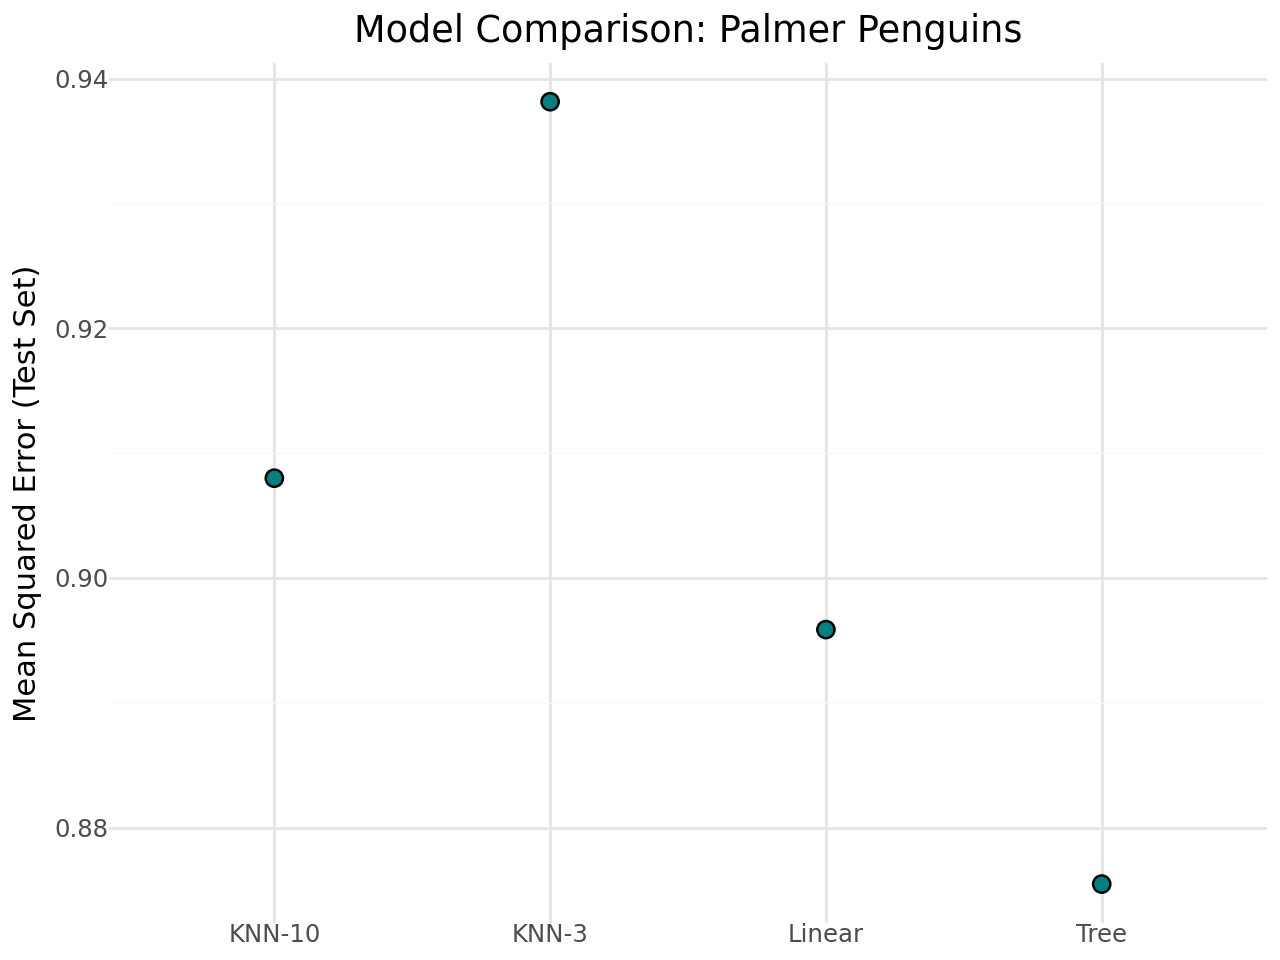

In [10]:
(
    ggplot(results_df, aes(x="Model", y="Test_Error"))
    + geom_point(fill="teal", size=3)
    + labs(title="Model Comparison: Palmer Penguins",
           y="Mean Squared Error (Test Set)", x="")
    + theme_minimal()
)


The decision tree performs best overall with the lowest test MSE, showing it captures important nonlinear relationships.